In [2]:
from qiskit.quantum_info.operators import  SparsePauliOp
from qiskit.circuit import QuantumCircuit
from qiskit_algorithms.time_evolvers.variational import RealMcLachlanPrinciple
from qiskit.quantum_info import DensityMatrix
import datetime
import pickle
# 获取当前日期和时间，然后格式化为日期+小时+分钟
formatted_now = datetime.datetime.now().strftime("%m-%d %H:%M")
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('./LMS-AVQDS-07-22 17:12.pkl','rb') as f:
    lms = pickle.load(f)

with open('./LMS-AVQDS-07-22 18:01.pkl','rb') as f:
    lms2 = pickle.load(f)

In [4]:
lms.exact_energy
lms.var_energy
fidility1 = [np.abs(lms.exact_state[index].conj().T@lms.var_state[index])**2 for index,_ in enumerate(lms.exact_state) ]

In [71]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import  Estimator

oberseravle_X0X1 = SparsePauliOp.from_sparse_list([("XX", [0,1], 1)],num_qubits=4)
oberseravle_Y0Y1 = SparsePauliOp.from_sparse_list([("YY", [0,1], 1)],num_qubits=4)
oberseravle_X0X3 = SparsePauliOp.from_sparse_list([("XX", [0,3], 1)],num_qubits=4)
oberseravle_Y0Y3 = SparsePauliOp.from_sparse_list([("YY", [0,3], 1)],num_qubits=4)
expect_var_value_X0X1 = []
expect_var_value_Y0Y1 = []

expect_exact_value_X0X1 = []
expect_exact_value_Y0Y1 = []



for i in range(len(lms.var_state)):
    resultXX = lms.var_state[i].conj().T@oberseravle_X0X1.to_matrix()@lms.var_state[i]
    resultXX/= lms.var_state[i].conj().T@lms.var_state[i]
    
    resultXX_exact = lms.exact_state[i].conj().T@oberseravle_X0X1.to_matrix()@lms.exact_state[i]
    resultXX_exact /= lms.exact_state[i].conj().T@lms.exact_state[i]
    
    
    
    resultYY = lms.var_state[i].conj().T@oberseravle_Y0Y1.to_matrix()@lms.var_state[i]
    resultYY/= lms.var_state[i].conj().T@lms.var_state[i]
    
    
    resultYY_exact = lms.exact_state[i].conj().T@oberseravle_Y0Y1.to_matrix()@lms.exact_state[i]
    resultYY_exact /= lms.exact_state[i].conj().T@lms.exact_state[i]
    expect_var_value_X0X1.append(np.real(resultXX))
    expect_var_value_Y0Y1.append(np.real(resultYY))
    expect_exact_value_X0X1.append(np.real(resultXX_exact))
    expect_exact_value_Y0Y1.append(np.real(resultYY_exact))
    
    
    
    

In [27]:
expect_exact_value_X0X1

[0.9137239878840768,
 0.9135999392083805,
 0.9134675863670076,
 0.9133269230373107,
 0.9131779433544573,
 0.913020641911894,
 0.9128550137617847,
 0.912681054415426,
 0.9124987598436336,
 0.9123081264771048,
 0.9121091512067562,
 0.9119018313840355,
 0.9116861648212042,
 0.9114621497916017,
 0.911229785029877,
 0.9109890697321983,
 0.9107400035564361,
 0.9104825866223212,
 0.9102168195115755,
 0.9099427032680198,
 0.9096602393976518,
 0.9093694298687034,
 0.9090702771116705,
 0.9087627840193121,
 0.9084469539466334,
 0.9081227907108356,
 0.9077902985912419,
 0.9074494823291999,
 0.9071003471279564,
 0.9067428986525062,
 0.9063771430294186]

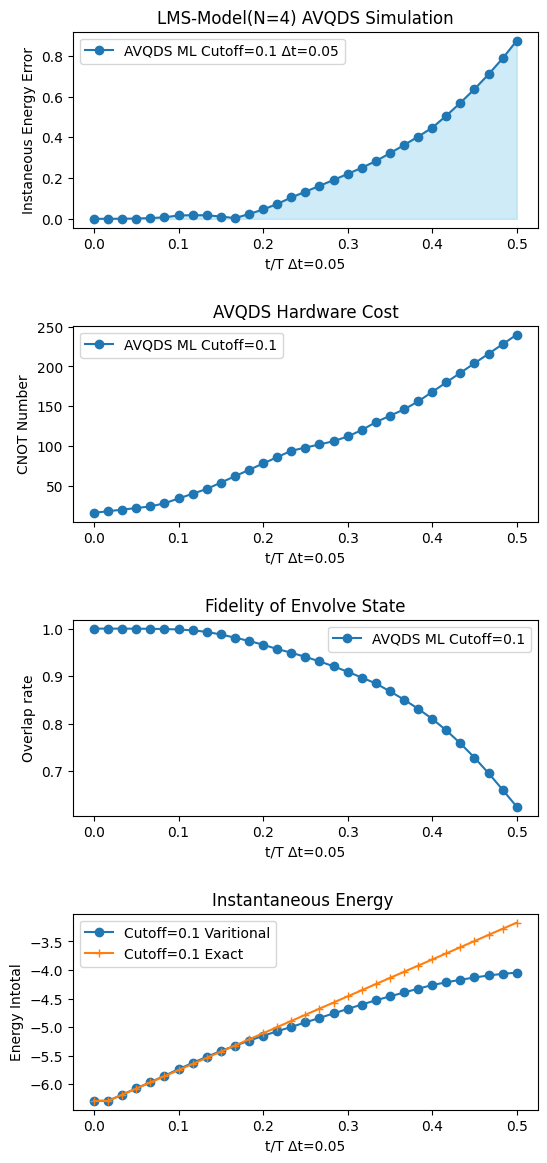

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 假设每个时间步的间隔是 0.02
time_steps1 = np.arange(len(lms.exact_energy)) 
time_steps1 = [i/60 for i in time_steps1]

# time_steps2 = np.arange(len(lms2.exact_energy))[:14]
# time_steps2 = [i/30 for i in time_steps2]

# 创建一个图形和一个子图
fig, ax = plt.subplots(4,1,figsize=(6,14))
instaneous_energy_error1 = [np.abs(lms.exact_energy[index]-lms.var_energy[index]) for index,i in enumerate(lms.exact_energy)]
instaneous_energy_error2 = [np.abs(lms2.exact_energy[index]-lms2.var_energy[index]) for index,i in enumerate(lms2.exact_energy)]


# 在子图上绘制数据
ax[0].plot(time_steps1,instaneous_energy_error1, label='AVQDS ML Cutoff=0.1 Δt=0.05',marker='o')
#ax[0].plot(time_steps2,instaneous_energy_error2, label='AVQDS ML Cutoff=0.1 Δt=0.1')
# 设置轴标签和标题#
# ax[0].set_xlabel('Time step')
ax[0].set_ylabel('Instaneous Energy Error')
ax[0].set_title('LMS-Model(N=4) AVQDS Simulation')
ax[0].fill_between(time_steps1, instaneous_energy_error1, color="skyblue", alpha=0.4)
ax[0].set_xlabel('t/T Δt=0.05')

ax[1].plot(time_steps1, lms.CircuitCNOTHistory, label='AVQDS ML Cutoff=0.1',marker='o')
ax[1].set_xlabel('t/T Δt=0.05')
ax[1].set_ylabel('CNOT Number')
ax[1].set_title('AVQDS Hardware Cost')

ax[2].plot(time_steps1, fidility1, label='AVQDS ML Cutoff=0.1',marker='o')
ax[2].set_xlabel('t/T Δt=0.05')
ax[2].set_ylabel('Overlap rate')
ax[2].set_title('Fidelity of Envolve State')

# ax[3].plot(time_steps1, expect_exact_value_Y0Y1, label='AVQDS ML Cutoff=0.1',marker='o')
# ax[3].plot(time_steps1, expect_exact_value_X0X1, label='Exact $S_0^{x}S_1^{x}$',marker='o')
# ax[3].plot(time_steps1, expect_var_value_X0X1, label='AVQDS ML Cutoff=0.1',marker='o')
ax[3].plot(time_steps1,lms.var_energy, label='Cutoff=0.1 Varitional',marker='o')
ax[3].plot(time_steps1,lms.exact_energy, label='Cutoff=0.1 Exact',marker='+')
ax[3].set_xlabel('t/T Δt=0.05')
ax[3].set_ylabel('Energy Intotal')
ax[3].set_title('Instantaneous Energy ')





# ax[2].plot(time_steps, lms.GroundStateEnergyHistory, label='AVQDS(MVLP)',color='red',linestyle='--')
# ax[2].set_xlabel('Time Step Δt=0.02')
# ax[2].set_ylabel('CNOT Number')
# ax[2].set_title('AVQDS Cost')


# 显示图例
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# 调整子图之间的间距
plt.subplots_adjust(hspace=0.5)

# 显示图形
plt.show()

In [ ]:
import numpy as np

# 假设 LMSHamiltonian_with_time 函数或类已经定义
ham = LMSHamiltonian_with_time(T=3, N_site=4, h_z=-0.7)
ham_0 = ham.assign_parameters(dict(zip(ham.parameters, [0.0]*len(ham.parameters))))
e, v  = np.linalg.eig(ham_0.to_matrix())

# 初始化状态和参数
psi_t = []
e_t = []
g_e = []
initial_state = np.zeros(v[:, 0].shape)

# 时间参数
time_steps = np.linspace(0, 4.0, 100)
diff = time_steps[1] - time_steps[0]

# 初始状态
current_state = v[:, 0]
current_time =0.0

# 时间演化
for i in range(len(time_steps)):
    print('----------------------')
    print(f'当前H（{current_time}）')
    ham_t = ham.assign_parameters(dict(zip(ham.parameters, [current_time]*len(ham.parameters))))#Hamilton(t)
    U_t = np.exp(-1j * ham_t.to_matrix() * diff)  # 时间演化算符 e^(-iHt)
    exact_state = U_t @ current_state # current_state 是上一步的量子态 ｜Ψ(t)>, exact_state 是当前时间步的量子态 ｜Ψ(t+diff)>
    # exact_state = exact_state  # 归一化
    exact_energy = np.real(exact_state.conj().T @ ham_t.to_matrix() @ exact_state)/(exact_state.conj().T @ exact_state)
    exact_energy = np.real(exact_energy)
    e,v = np.linalg.eigh(ham_t.to_matrix())
    g_e.append(e[0])
    print(f'当前｜Ψ(t={current_time+diff})>,能量={exact_energy/8}')
    
    
    
    psi_t.append(exact_state)
    e_t.append(exact_energy/8)
    current_time+=diff
    
    current_state = exact_state

# 打印或处理结果
print("演化状态数:", len(psi_t))
print("能量:", e_t)


In [3]:
import numpy as np
import scipy.linalg

# 假设 LMSHamiltonian_with_time 函数或类已经定义
ham = LMSHamiltonian_with_time(T=3, N_site=4, h_z=-0.7)
ham_0 = ham.assign_parameters(dict(zip(ham.parameters, [0.0]*len(ham.parameters))))
e, v = np.linalg.eig(ham_0.to_matrix())

# 初始化状态和参数
psi_t = []
e_t = []
g_e = []
exact_state_history=[]
initial_state = np.zeros(v[:, 0].shape)
# 时间参数
time_steps = np.linspace(0, 3.0, 100)
time_steps_post = np.linspace(3.0, 6.0, 100)
diff = time_steps[1] - time_steps[0]

# 初始状态
current_state = v[:, 0]
current_time = 0.0

# 归一化函数
def normalize(state):
    norm = np.linalg.norm(state)
    return state / norm

# 时间演化
for i in range(len(time_steps)):
    ham_t = ham.assign_parameters(dict(zip(ham.parameters, [current_time]*len(ham.parameters)))) # Hamilton(t)
    
    # 使用 scipy.linalg.expm 计算矩阵指数
    U_t = scipy.linalg.expm(-1j * ham_t.to_matrix() * diff)  # 时间演化算符 e^(-iHt)
    
    exact_state = U_t @ current_state  # current_state 是上一步的量子态 ｜Ψ(t)>, exact_state 是当前时间步的量子态 ｜Ψ(t+diff)>
    
    # 归一化
    exact_state = normalize(exact_state)
    exact_state_history.append(exact_state)
    
    exact_energy = np.real(exact_state.conj().T @ ham_t.to_matrix() @ exact_state)
    exact_energy /= np.real(exact_state.conj().T @ exact_state)
    exact_energy = np.real(exact_energy)
    
    e, v = np.linalg.eigh(ham_t.to_matrix())
    g_e.append(e[0])
    # print(f'当前｜Ψ(t={current_time+diff})>,能量={exact_energy/8}')
    
    psi_t.append(exact_state)
    e_t.append(exact_energy / 8)
    current_time += diff
    current_state = exact_state
    
# 时间演化
for i in range(len(time_steps_post)):
    current_time = 3.0
    ham_t = ham.assign_parameters(dict(zip(ham.parameters, [current_time]*len(ham.parameters)))) # Hamilton(t)
    
    # 使用 scipy.linalg.expm 计算矩阵指数
    U_t = scipy.linalg.expm(-1j * ham_t.to_matrix() * diff)  # 时间演化算符 e^(-iHt)
    
    exact_state = U_t @ current_state  # current_state 是上一步的量子态 ｜Ψ(t)>, exact_state 是当前时间步的量子态 ｜Ψ(t+diff)>
    
    # 归一化
    exact_state = normalize(exact_state)
    exact_state_history.append(exact_state)
    
    exact_energy = np.real(exact_state.conj().T @ ham_t.to_matrix() @ exact_state)
    exact_energy /= np.real(exact_state.conj().T @ exact_state)
    exact_energy = np.real(exact_energy)
    
    e, v = np.linalg.eigh(ham_t.to_matrix())
    g_e.append(e[0])
    # print(f'当前｜Ψ(t={current_time+diff})>,能量={exact_energy/8}')
    
    psi_t.append(exact_state)
    e_t.append(exact_energy / 8)
    #current_time += diff
    current_state = exact_state

# 打印或处理结果
print("演化状态数:", len(psi_t))
print("能量:", e_t)


演化状态数: 200
能量: [-0.7996487640235024, -0.7915030521714997, -0.7833585827337304, -0.7752190124008093, -0.7670902090041961, -0.7589799361310179, -0.7508974524348493, -0.7428530565472775, -0.7348576099152454, -0.7269220689126187, -0.7190570545064939, -0.711272483024118, -0.7035772756623738, -0.695979157833127, -0.6884845527548706, -0.6810985673459846, -0.6738250628350582, -0.6666667978746504, -0.6596256285221975, -0.6527027473304438, -0.6458989429707541, -0.6392148622146495, -0.6326512575737834, -0.6262092062490814, -0.6198902890377009, -0.6136967212503136, -0.6076314312621012, -0.6016980858362333, -0.5959010646228854, -0.5902453890893269, -0.5847366134559443, -0.5793806869193899, -0.5741837974981508, -0.5691522082366564, -0.5642920962842067, -0.5596094045854819, -0.5551097146633508, -0.5507981473411361, -0.5466792963488784, -0.5427571976986342, -0.5390353356077885, -0.5355166837008493, -0.5322037783231787, -0.5290988191355588, -0.5262037907921979, -0.5235205984861386, -0.5210512095073452,

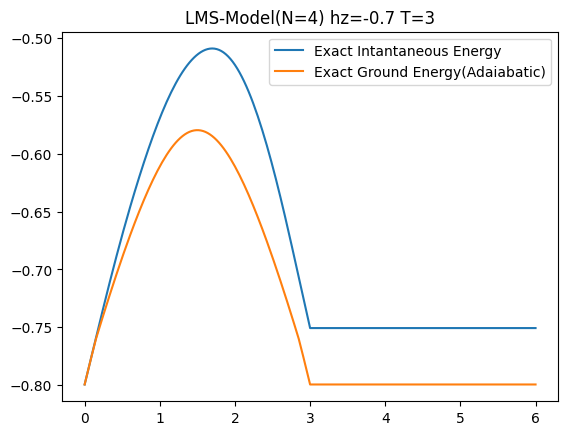

In [4]:
plt.title('LMS-Model(N=4) hz=-0.7 T=3')
time = np.append(time_steps,time_steps_post)
plt.plot(time,e_t,label='Exact Intantaneous Energy')
plt.plot(time,[i/8 for i in g_e],label='Exact Ground Energy(Adaiabatic)')
plt.legend()

In [80]:
spin_X0X1=[]
spin_Y0Y1=[]
spin_X0X3=[]
spin_Y0Y3=[]

spin_X0X7=[]
spin_Y0Y7=[]

oberseravle_X0X1 = SparsePauliOp.from_sparse_list([("XX", [0,1], 1)],num_qubits=8)
oberseravle_Y0Y1 = SparsePauliOp.from_sparse_list([("YY", [0,1], 1)],num_qubits=8)
oberseravle_X0X7 = SparsePauliOp.from_sparse_list([("XX", [0,7], 1)],num_qubits=8)
oberseravle_Y0Y7 = SparsePauliOp.from_sparse_list([("YY", [0,7], 1)],num_qubits=8)

for i in range(len(exact_state_history)):
    resultX0X1 = exact_state_history[i].conj().T@oberseravle_X0X1.to_matrix()@exact_state_history[i]
    resultX0X1 /= exact_state_history[i].conj().T@exact_state_history[i]
    
    resultY0Y1 = exact_state_history[i].conj().T@oberseravle_Y0Y1.to_matrix()@exact_state_history[i]
    resultY0Y1 /= exact_state_history[i].conj().T@exact_state_history[i]
    
    resultY0Y7 = exact_state_history[i].conj().T@oberseravle_Y0Y7.to_matrix()@exact_state_history[i]
    resultY0Y7 /= exact_state_history[i].conj().T@exact_state_history[i]
    
    resultX0X7 = exact_state_history[i].conj().T@oberseravle_X0X7.to_matrix()@exact_state_history[i]
    resultX0X7 /= exact_state_history[i].conj().T@exact_state_history[i]
    
    spin_X0X1.append(np.real(resultX0X1))
    spin_X0X7.append(np.real(resultX0X7))
    spin_Y0Y1.append(np.real(resultY0Y1))
    spin_Y0Y7.append(np.real(resultY0Y7))
    
    
    


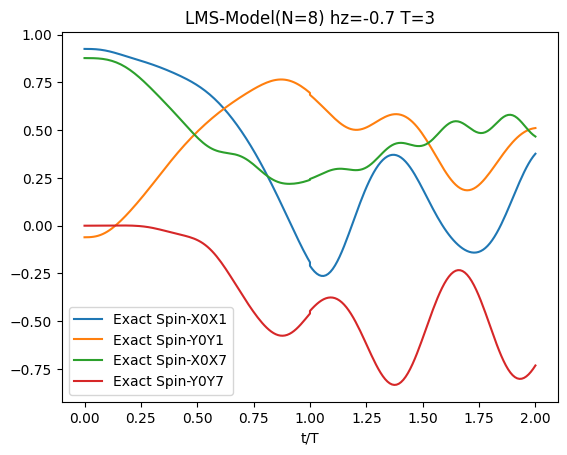

In [85]:
plt.title('LMS-Model(N=8) hz=-0.7 T=3')
t = np.append(time_steps,time_steps_post)
plt.plot([i/3 for i in t],spin_X0X1,label='Exact Spin-X0X1')
plt.plot([i/3 for i in t],spin_Y0Y1,label='Exact Spin-Y0Y1')
plt.plot([i/3 for i in t],spin_X0X7,label='Exact Spin-X0X7')
plt.plot([i/3 for i in t],spin_Y0Y7,label='Exact Spin-Y0Y7')
plt.xlabel('t/T')
plt.legend()

In [ ]:
plt.title('Classical Method Ground State Energy per Site')
plt.plot(np.linspace(0.0,3.0,100),[i/8 for i in g_e],label='N_site=8,T=3,hz=-0.7')
plt.legend()
    

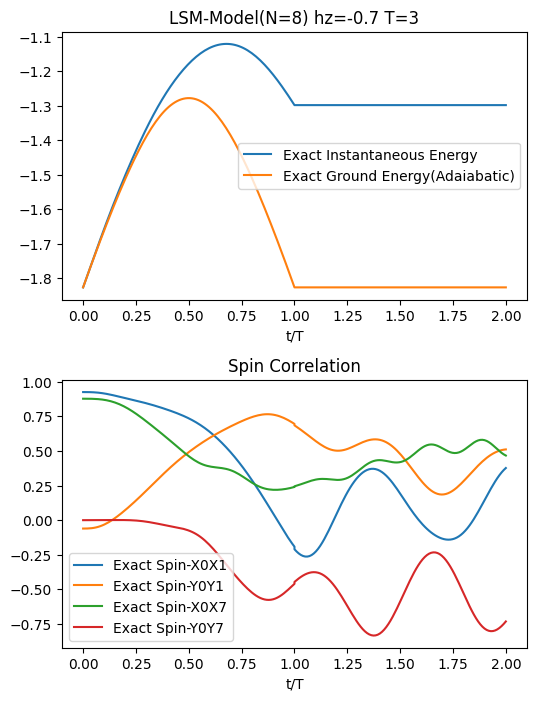

In [90]:
import matplotlib.pyplot as plt
import numpy as np


# 创建一个图形和一个子图
fig, ax = plt.subplots(2,1,figsize=(6,8))
instaneous_energy_error1 = [np.abs(lms.exact_energy[index]-lms.var_energy[index]) for index,i in enumerate(lms.exact_energy)]
instaneous_energy_error2 = [np.abs(lms2.exact_energy[index]-lms2.var_energy[index]) for index,i in enumerate(lms2.exact_energy)]


# 在子图上绘制数据
#ax[0].plot(time_steps1,instaneous_energy_error1, label='AVQDS ML Cutoff=0.1 Δt=0.05',marker='o')
#ax[0].plot(time_steps2,instaneous_energy_error2, label='AVQDS ML Cutoff=0.1 Δt=0.1')
# 设置轴标签和标题#
# ax[0].set_xlabel('Time step')


ax[0].set_title('LSM-Model(N=8) hz=-0.7 T=3')
t = np.linspace(0.0,3.0,100)
time_steps8 = np.append(time_steps,time_steps_post)
ax[0].plot([i/3 for i in time_steps8],e_t,label='Exact Instantaneous Energy')
ax[0].plot([i/3 for i in time_steps8],[i/8 for i in g_e],label='Exact Ground Energy(Adaiabatic)')
ax[0].set_xlabel('t/T')

ax[1].set_title('Spin Correlation')
t = np.linspace(0.0,3.0,100)
ax[1].plot([i/3 for i in time_steps8],spin_X0X1,label='Exact Spin-X0X1')
ax[1].plot([i/3 for i in time_steps8],spin_Y0Y1,label='Exact Spin-Y0Y1')
ax[1].plot([i/3 for i in time_steps8],spin_X0X7,label='Exact Spin-X0X7')
ax[1].plot([i/3 for i in time_steps8],spin_Y0Y7,label='Exact Spin-Y0Y7')

ax[1].set_xlabel('t/T')

# ax[1].plot(time_steps1, lms.CircuitCNOTHistory, label='AVQDS ML Cutoff=0.1',marker='o')
# ax[1].set_xlabel('t/T Δt=0.05')
# ax[1].set_ylabel('CNOT Number')
# ax[1].set_title('AVQDS Hardware Cost')

# 显示图例
ax[0].legend()
ax[1].legend()
# 调整子图之间的间距
plt.subplots_adjust(hspace=0.3)

# 显示图形
plt.show()

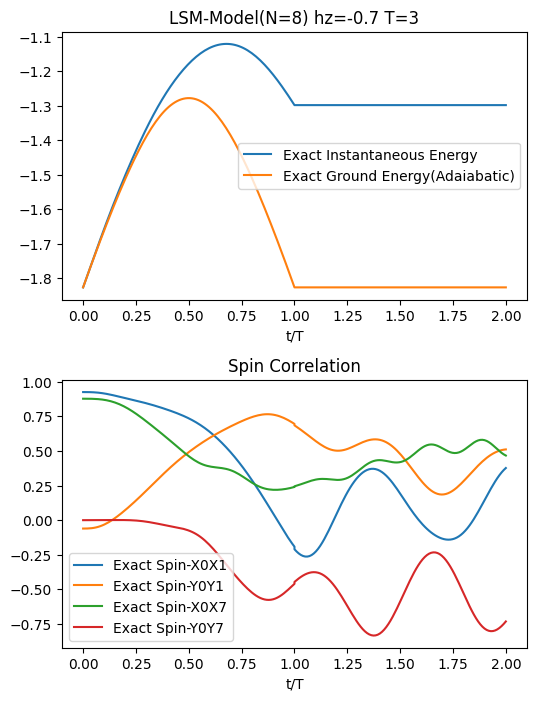

In [91]:
import matplotlib.pyplot as plt
import numpy as np


# 创建一个图形和一个子图
fig, ax = plt.subplots(2,1,figsize=(6,8))
instaneous_energy_error1 = [np.abs(lms.exact_energy[index]-lms.var_energy[index]) for index,i in enumerate(lms.exact_energy)]
instaneous_energy_error2 = [np.abs(lms2.exact_energy[index]-lms2.var_energy[index]) for index,i in enumerate(lms2.exact_energy)]


# 在子图上绘制数据
#ax[0].plot(time_steps1,instaneous_energy_error1, label='AVQDS ML Cutoff=0.1 Δt=0.05',marker='o')
#ax[0].plot(time_steps2,instaneous_energy_error2, label='AVQDS ML Cutoff=0.1 Δt=0.1')
# 设置轴标签和标题#
# ax[0].set_xlabel('Time step')


ax[0].set_title('LSM-Model(N=4) hz=-0.7 T=3')
t = np.linspace(0.0,3.0,100)
time_steps8 = np.append(time_steps,time_steps_post)
ax[0].plot([i/3 for i in time_steps8],e_t,label='Exact Instantaneous Energy')
ax[0].plot([i/3 for i in time_steps8],[i/8 for i in g_e],label='Exact Ground Energy(Adaiabatic)')
ax[0].set_xlabel('t/T')

ax[1].set_title('Spin Correlation')
t = np.linspace(0.0,3.0,100)
ax[1].plot([i/3 for i in time_steps8],spin_X0X1,label='Exact Spin-X0X1')
ax[1].plot([i/3 for i in time_steps8],spin_Y0Y1,label='Exact Spin-Y0Y1')
ax[1].plot([i/3 for i in time_steps8],spin_X0X7,label='Exact Spin-X0X7')
ax[1].plot([i/3 for i in time_steps8],spin_Y0Y7,label='Exact Spin-Y0Y7')

ax[1].set_xlabel('t/T')

# ax[1].plot(time_steps1, lms.CircuitCNOTHistory, label='AVQDS ML Cutoff=0.1',marker='o')
# ax[1].set_xlabel('t/T Δt=0.05')
# ax[1].set_ylabel('CNOT Number')
# ax[1].set_title('AVQDS Hardware Cost')

# 显示图例
ax[0].legend()
ax[1].legend()
# 调整子图之间的间距
plt.subplots_adjust(hspace=0.3)

# 显示图形
plt.show()